<h1>Project Title: Vehicle Insurance Claim Fraud Detection</h1>

<p><b>Project Idea:</b> This project aims to detect fraud in the Automobile Insurance domain using machine learning algorithms. By analyzing various factors such as policyholder demographics, vehicle details, claim characteristics, and historical claim patterns from the "carclaims.csv" dataset, the goal is to identify claims that are most likely to be fraudulent. This will help insurance companies reduce financial losses, optimize resource allocation, and enhance trust in the insurance system. </p>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
!pip install category_encoders

import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , Normalizer
from sklearn.preprocessing import StandardScaler , RobustScaler
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
!pip install xgboost

import xgboost as xgb

# Load and Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving carclaims.csv to carclaims.csv


In [ ]:
df = pd.read_csv('carclaims.csv')

In [ ]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# EDA

In [ ]:
df.shape

(15420, 33)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
df.describe(include='object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy,FraudFound
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,3,6,5,4,4,8,9,2,2,2,4,5,5,3,2
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,No
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,9671,8079,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962,14497


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy',
 'FraudFound']

In [ ]:
df.isnull().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
df.duplicated().sum()

np.int64(0)

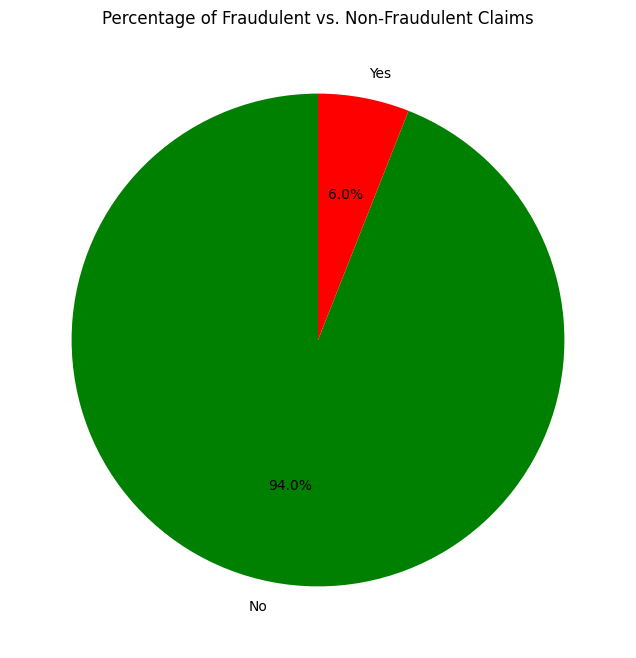

In [ ]:
# Pie chart of 'Is_Fraudulent'
plt.figure(figsize=(8, 8))
df['FraudFound'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['Green', 'Red'])
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Claims')
plt.ylabel('')
plt.show()

# Data Cleaning

In [ ]:
df['Age'].value_counts()

,count
Age,
30,596
33,574
34,573
35,569
28,560
29,552
31,550
32,544
27,540


In [ ]:
df.drop(df[df['Age'] == 0].index, inplace=True)

Outliers

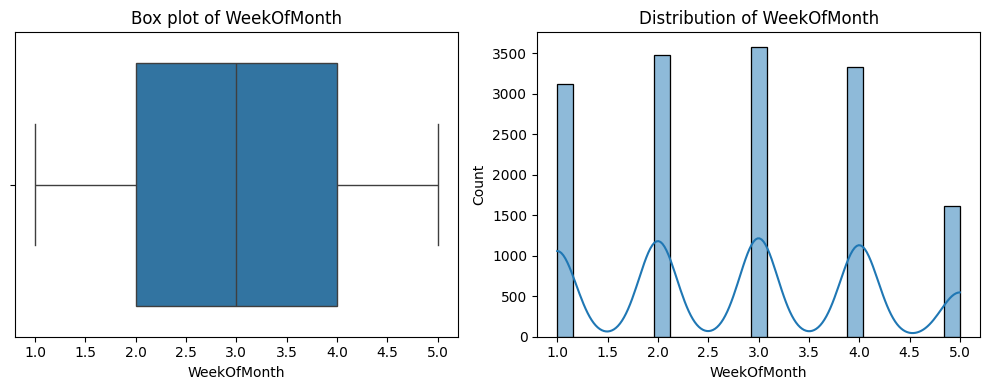

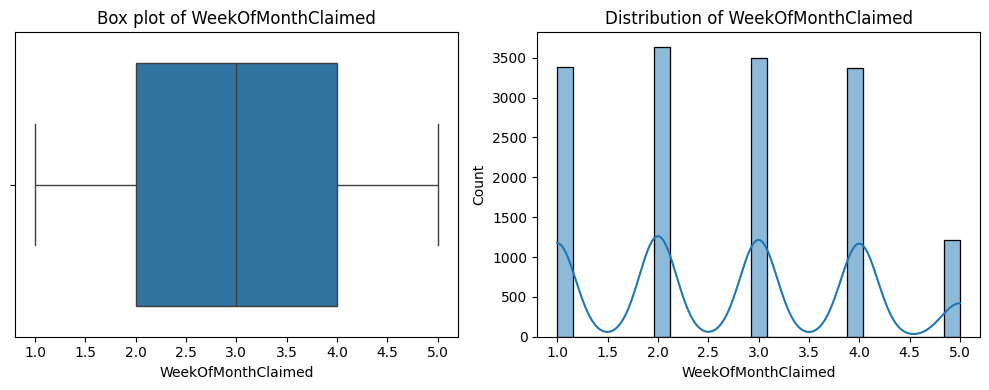

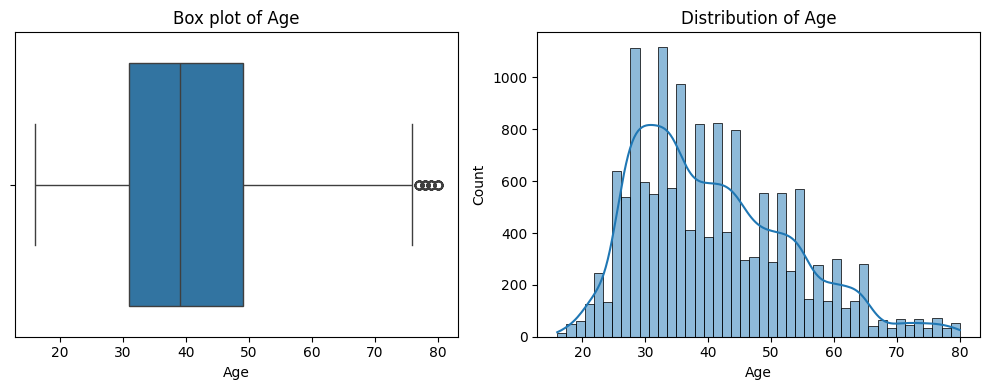

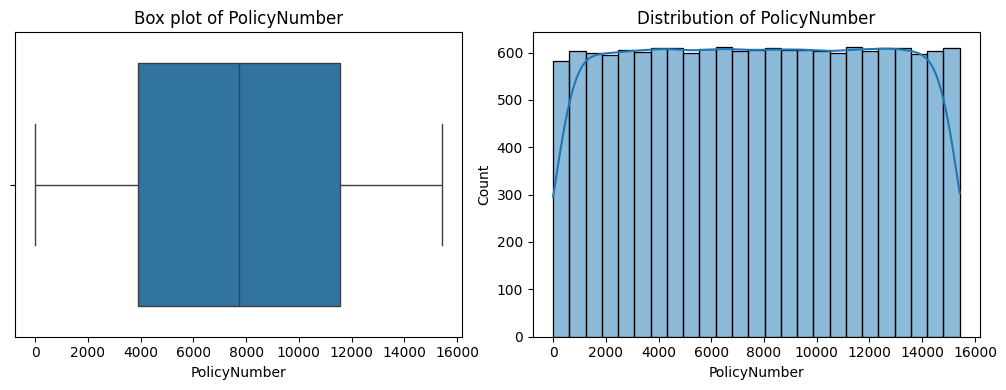

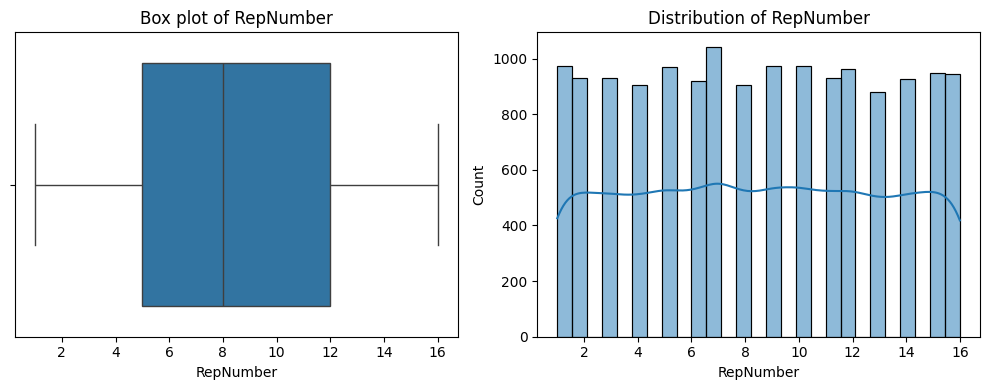

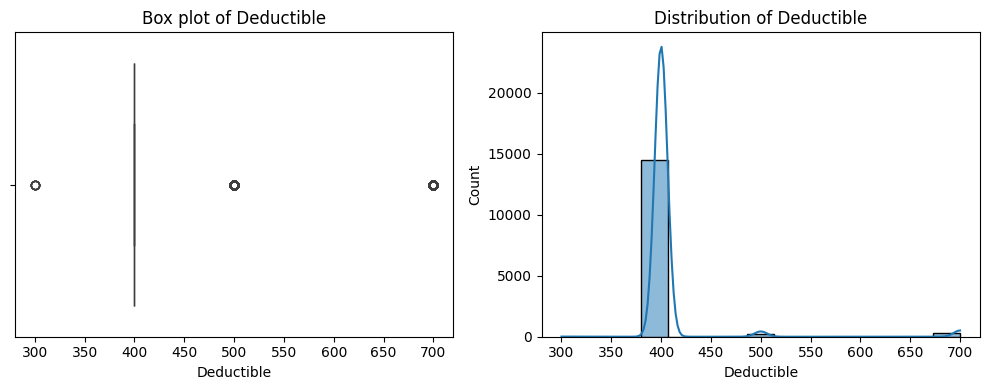

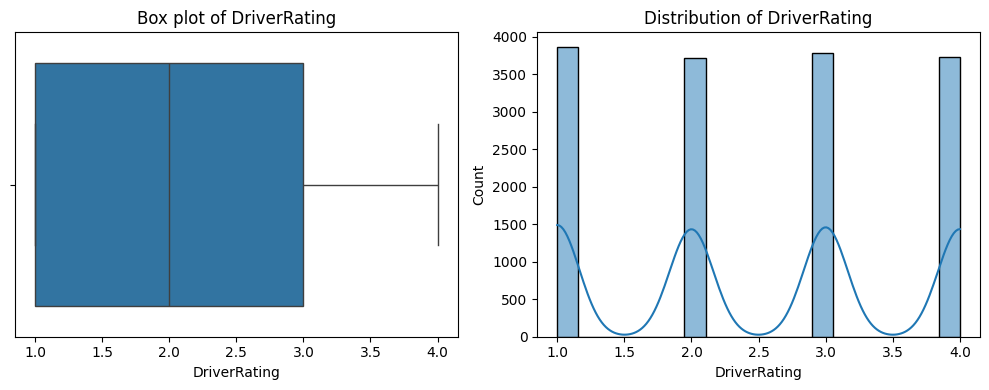

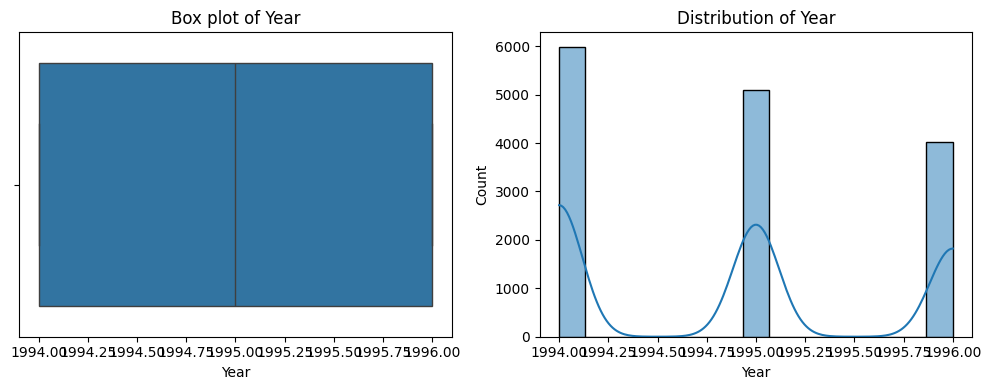

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

# Feature Engineering

In [ ]:
data = df.copy()

Time Lag Between Accident and Claim

In [ ]:
month_map = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
             "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
data["Month_numeric"] = data["Month"].map(month_map)
data["MonthClaimed_numeric"] = data["MonthClaimed"].map(month_map)
data["Month_Diff"] = data["MonthClaimed_numeric"] - data["Month_numeric"]
# Adjust for year change if MonthClaimed < Month (e.g., Dec to Jan)
data["Month_Diff"] = data.apply(lambda x: x["Month_Diff"] + 12 if x["Month_Diff"] < 0 else x["Month_Diff"], axis=1)

In [ ]:
data["Month_Diff"].value_counts()

,count
Month_Diff,
0,11230
1,3146
2,378
3,140
4,75
5,36
6,32
7,23
8,20


No Verification Flag : Create a feature indicating claims without a police report or witness

In [ ]:
data["No_Verification"] = ((data["PoliceReportFiled"] == "No") & (data["WitnessPresent"] == "No")).astype(int)

# Feature Selection

In [ ]:
data_to_model = data.copy()

In [ ]:
data_to_model.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Month_numeric', 'MonthClaimed_numeric',
       'Month_Diff', 'No_Verification'],
      dtype='object')

In [ ]:
data_to_model.drop(['Month', 'MonthClaimed'], axis=1, inplace=True)

apply encoding to check correlation

In [ ]:
data_to_model.isnull().sum()

,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0
Age,0
Fault,0


In [ ]:
basic_encod = data_to_model.copy()

In [ ]:
# Define the features for target encoding
target_encode_features = ['Make', 'PolicyType', 'VehiclePrice', 'AgeOfVehicle', 'AgeOfPolicyHolder']

# Define the label column
label_col = 'FraudFound' # Assuming 'FraudFound' is the target variable

# Create a copy of the dataframe to avoid modifying the original
encoded_df = basic_encod.copy()

# Create a TargetEncoder instance
# We need to encode the label column into a numerical format for the encoder
# Assuming 'FraudFound' is 'Yes' and 'No', let's map them to 1 and 0 respectively
encoded_df[label_col] = encoded_df[label_col].map({'Yes': 1, 'No': 0})

encoder = ce.TargetEncoder(cols=target_encode_features)

# Fit and transform the specified features
encoded_df = encoder.fit_transform(encoded_df, encoded_df[label_col])

# Label encode the remaining categorical features
other_categorical_cols = [col for col in basic_encod.columns if basic_encod[col].dtype == 'object' and col not in target_encode_features]

for col in other_categorical_cols:
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

# Display the first few rows of the encoded dataframe
print(encoded_df.head())

   WeekOfMonth  DayOfWeek      Make  AccidentArea  DayOfWeekClaimed  \
0            5          6  0.059629             1                 5   
1            3          6  0.059629             1                 1   
2            5          0  0.059629             1                 4   
3            2          2  0.059596             0                 0   
4            5          1  0.059629             1                 5   

   WeekOfMonthClaimed  Sex  MaritalStatus  Age  Fault  PolicyType  \
0                   1    0              2   21      0    0.051387   
1                   4    1              2   34      0    0.139535   
2                   2    1              1   47      0    0.139535   
3                   1    1              1   65      1    0.007218   
4                   2    0              2   27      1    0.139535   

   VehicleCategory  VehiclePrice  PolicyNumber  RepNumber  Deductible  \
0                1       0.08559             1         12         300   
1           

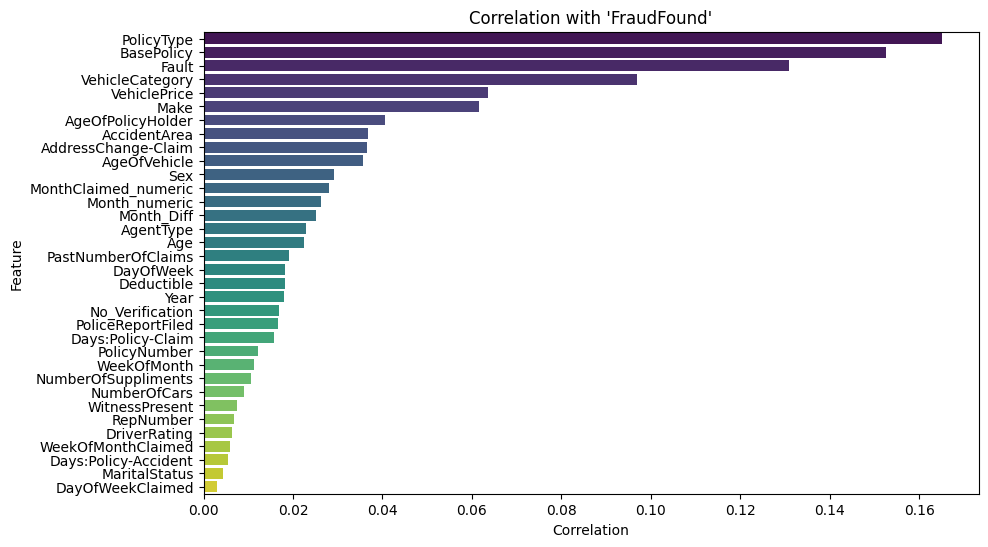

In [ ]:
# Compute correlations
correlations = encoded_df.corr()["FraudFound"].drop("FraudFound").abs().sort_values(ascending=False)

# Prepare data for plotting
correlation_df = pd.DataFrame({
    "Feature": correlations.index,
    "Correlation": correlations.values
})

# plot correlation df
plt.figure(figsize=(10, 6))
sns.barplot(x="Correlation", y="Feature", data=correlation_df, palette="viridis")
plt.title("Correlation with 'FraudFound'")
plt.show()

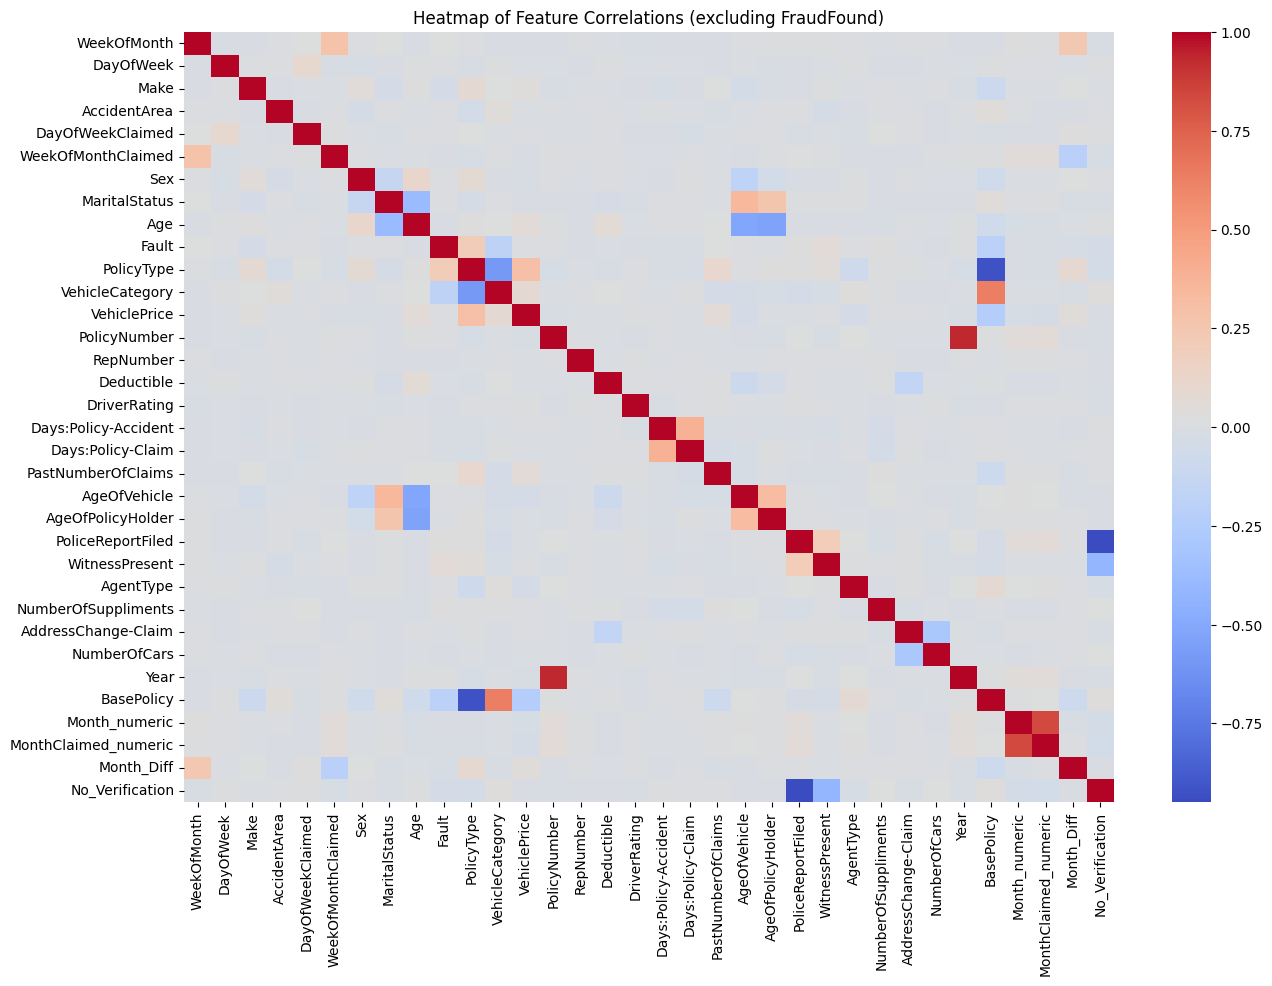

In [ ]:
correlation_matrix = encoded_df.drop(columns=['FraudFound']).corr()
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations (excluding FraudFound)')
plt.show()

In [ ]:
data_to_model.drop(['PolicyNumber'], axis=1, inplace=True)

In [ ]:
data_to_model.head(5)

,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Month_numeric,MonthClaimed_numeric,Month_Diff,No_Verification
0,5,Wednesday,Honda,Urban,Tuesday,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,12,1,1,1
1,3,Wednesday,Honda,Urban,Monday,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0
2,5,Friday,Honda,Urban,Thursday,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,10,11,1,1
3,2,Saturday,Toyota,Rural,Friday,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,6,7,1,0
4,5,Monday,Honda,Urban,Tuesday,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,2,1,1


# Pre Processing

## Split data

In [ ]:
X = data_to_model.drop('FraudFound', axis=1)
Y = data_to_model['FraudFound']

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42 , shuffle=True)

## Encoding

In [ ]:
target_encode_features = ['Make', 'PolicyType', 'VehiclePrice', 'AgeOfVehicle', 'AgeOfPolicyHolder']

In [ ]:
le = LabelEncoder()

In [ ]:
te = ce.TargetEncoder(cols=target_encode_features)

In [ ]:
Y_train = le.fit_transform(Y_train)
Y_test_classification = le.transform(Y_test)

In [ ]:
X_train = te.fit_transform(X_train, Y_train)
X_test = te.transform(X_test)

other_categorical_cols_X = [col for col in X_train.columns if X_train[col].dtype == 'object' and col not in target_encode_features]

for col in other_categorical_cols_X:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

## Scaling & Normalization

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Handling Class Imbalance

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
original_counts = np.unique(Y_train, return_counts=True)
smote_counts = np.unique(Y_train_smote, return_counts=True)

print("Original class distribution:", dict(zip(original_counts[0], original_counts[1])))
print("SMOTE class distribution:", dict(zip(smote_counts[0], smote_counts[1])))

Original class distribution: {np.int64(0): np.int64(11369), np.int64(1): np.int64(711)}
SMOTE class distribution: {np.int64(0): np.int64(11369), np.int64(1): np.int64(11369)}


# Machine Learning Models

## SVM

In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train_smote, Y_train_smote)
Y_pred_svm = svm.predict(X_test)

print("SVM Classifier:")
print("Accuracy:", accuracy_score(Y_test_classification, Y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(Y_test_classification, Y_pred_svm))
print("Classification Report:\n", classification_report(Y_test_classification, Y_pred_svm))

SVM Classifier:
Accuracy: 0.830794701986755
Confusion Matrix:
 [[2426  413]
 [  98   83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      2839
           1       0.17      0.46      0.25       181

    accuracy                           0.83      3020
   macro avg       0.56      0.66      0.57      3020
weighted avg       0.91      0.83      0.87      3020



## Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, Y_train_smote)

# Make predictions
Y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(Y_test_classification, Y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test_classification, Y_pred_lr))
print("Classification Report:\n", classification_report(Y_test_classification, Y_pred_lr))

Logistic Regression Classifier:
Accuracy: 0.6718543046357616
Confusion Matrix:
 [[1882  957]
 [  34  147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.66      0.79      2839
           1       0.13      0.81      0.23       181

    accuracy                           0.67      3020
   macro avg       0.56      0.74      0.51      3020
weighted avg       0.93      0.67      0.76      3020



## Naive Bayes

In [ ]:
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_smote, Y_train_smote)

# Make predictions
Y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
print("Gaussian Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(Y_test_classification, Y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(Y_test_classification, Y_pred_gnb))
print("Classification Report:\n", classification_report(Y_test_classification, Y_pred_gnb))

Gaussian Naive Bayes Classifier:
Accuracy: 0.6543046357615894
Confusion Matrix:
 [[1823 1016]
 [  28  153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.64      0.78      2839
           1       0.13      0.85      0.23       181

    accuracy                           0.65      3020
   macro avg       0.56      0.74      0.50      3020
weighted avg       0.93      0.65      0.74      3020



## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

# Train the model
dtc.fit(X_train_smote, Y_train_smote)

# Make predictions
Y_pred_dtc = dtc.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(Y_test_classification, Y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(Y_test_classification, Y_pred_dtc))
print("Classification Report:\n", classification_report(Y_test_classification, Y_pred_dtc))

# Optional: Visualize the decision tree (for smaller trees)
# plt.figure(figsize=(20,10))
# plot_tree(dtc, feature_names=X.columns.tolist(), class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
# plt.show()

# Optional: Print the text representation of the tree
# tree_text = export_text(dtc, feature_names=X.columns.tolist())
# print(tree_text)

Decision Tree Classifier:
Accuracy: 0.8877483443708609
Confusion Matrix:
 [[2652  187]
 [ 152   29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2839
           1       0.13      0.16      0.15       181

    accuracy                           0.89      3020
   macro avg       0.54      0.55      0.54      3020
weighted avg       0.90      0.89      0.89      3020



## Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(X_train_smote, Y_train_smote)

# Make predictions
Y_pred_rfc = rfc.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(Y_test_classification, Y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(Y_test_classification, Y_pred_rfc))
print("Classification Report:\n", classification_report(Y_test_classification, Y_pred_rfc))

Random Forest Classifier:
Accuracy: 0.937748344370861
Confusion Matrix:
 [[2829   10]
 [ 178    3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2839
           1       0.23      0.02      0.03       181

    accuracy                           0.94      3020
   macro avg       0.59      0.51      0.50      3020
weighted avg       0.90      0.94      0.91      3020



## XGBosst

In [ ]:
# XGBoost
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_clf.fit(X_train_smote, Y_train_smote)

# Make predictions
Y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(Y_test_classification, Y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test_classification, Y_pred_xgb))
print("Classification Report:\n", classification_report(Y_test_classification, Y_pred_xgb))

XGBoost Classifier:
Accuracy: 0.9407284768211921
Confusion Matrix:
 [[2824   15]
 [ 164   17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2839
           1       0.53      0.09      0.16       181

    accuracy                           0.94      3020
   macro avg       0.74      0.54      0.56      3020
weighted avg       0.92      0.94      0.92      3020

